Notebook als Präsentation bauen:
``` $ jupyter nbconvert notebooks/presentation_slides_german.ipynb --to slides --post serve ```

In [1]:
import pandas as pd
import numpy as np
import sklearn
import sklearn.linear_model

# Was ist Data Science?

Kern: Aus histoischen Daten Vorhersagen treffen.

Dafür gibt es viele Algorithmen.
Eine einfache und weit verbreitete ist die lineare Regression.

# Lineare Regression

Wir verwenden einen Mini-Datensatz der 1960 von Nancy Howell zum Studium des Volkes der ǃKung gesammelt wurde (https://en.wikipedia.org/wiki/%C7%83Kung_people) (und nur Personen <= 25 Jahre)


In [2]:
df = pd.read_csv("../data/Howell1_young.csv")

In [3]:
df.head()

,height,weight,age,male
0,147.955,34.869885,19.0,0
1,149.900,47.700000,20.0,0
2,121.920,19.617854,12.0,1
3,105.410,13.947954,8.0,0
4,86.360,10.489315,6.5,0


<AxesSubplot: xlabel='age', ylabel='height'>

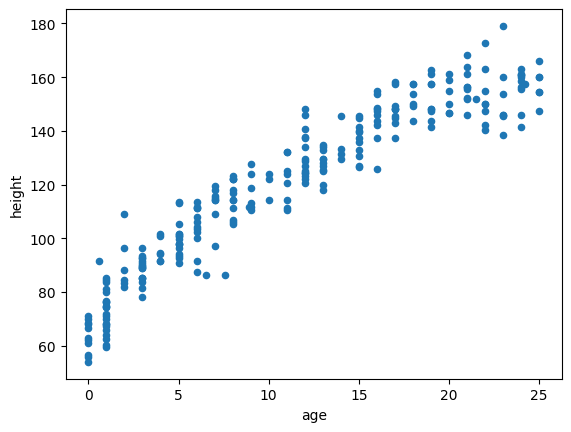

In [4]:
df.plot.scatter(x="age", y="height")

Modell: $y =f(x)$ mit $f$ unbekannt und *linear*.

$y = a\cdot x + b$

wähle $a,b$ so, dass $f$ "gut" zu den Daten passt $\to$ die mittlere quadratische Abweichung zwischen f und den Datenpunkten soll minimal sein.


Gegeben n Paare von Datenpunkten $(x^{(1)}, y^{(1)}), ..., (x^{(n)}, y^{(n)})$
suchen wir $a,b$ so dass der Ausdruck

$\frac{1}{n} \sum_{i=1}^n (a\cdot x^{(i)} + b - y^{(i)})^2$

minimal wird.

Zuerst teilen wir die Daten in 2 Teile: Training und Test.

Training $\to$ Modell fitten.

Test $\to$ Modell evaluieren.

In [5]:
N = df.shape[0]
n = int(0.7 * N)

# get a random-number generator with fixed seed (-> reproducibility!)
rng = np.random.default_rng(42)

training_indices = list(rng.choice(range(0, N), n))

test_indices = list(set(range(0, N)).
                      difference(set(training_indices)))


In [6]:
linear_reg = sklearn.linear_model.LinearRegression()

x_train = df[["age"]].iloc[training_indices]
y_train = df["height"].iloc[training_indices]

x_test = df[["age"]].iloc[test_indices]
y_test = df["height"].iloc[test_indices]


linear_reg.fit(x_train,y_train) # berechnet a und b

LinearRegression()

In [7]:
a = linear_reg.coef_[0]
b = linear_reg.intercept_
print(f"a = {a}, b = {b}")

a = 3.860244883158264, b = 77.54831739015839


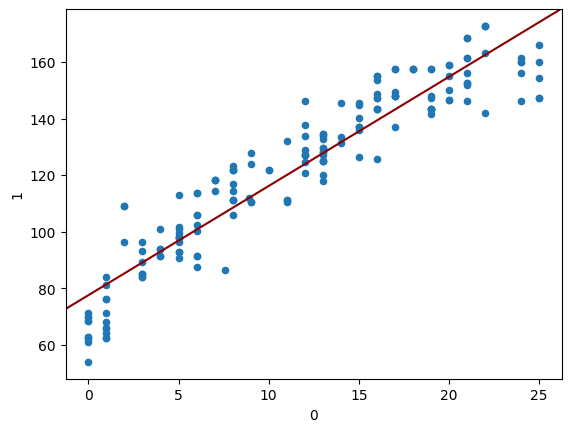

In [8]:
ax = pd.DataFrame(
      list(zip(x_train.iloc[:,0],y_train))). \
      plot.scatter(x=0, y=1)
      
y_pred_train = linear_reg.predict(x_train)
y_pred_test = linear_reg.predict(x_test)

ax.axline((0,b), slope=a, color="darkred")

# Modell-Evaluation

Jetzt: Evaluieren des Modells auf den Test-Daten.


In [9]:
print(f"Test MSE: \
     {sklearn.metrics.mean_squared_error(y_pred_test, y_test)}")

Test MSE:      105.1579411584524


## Over/Underfitting

Overfitting: Modell ist *zu genau* an die Trainingsdaten angepasst (und schlecht auf den Testdaten)

Underfitting: Modell ist *nicht komplex genug* um die Trainingsdaten zu fitten.

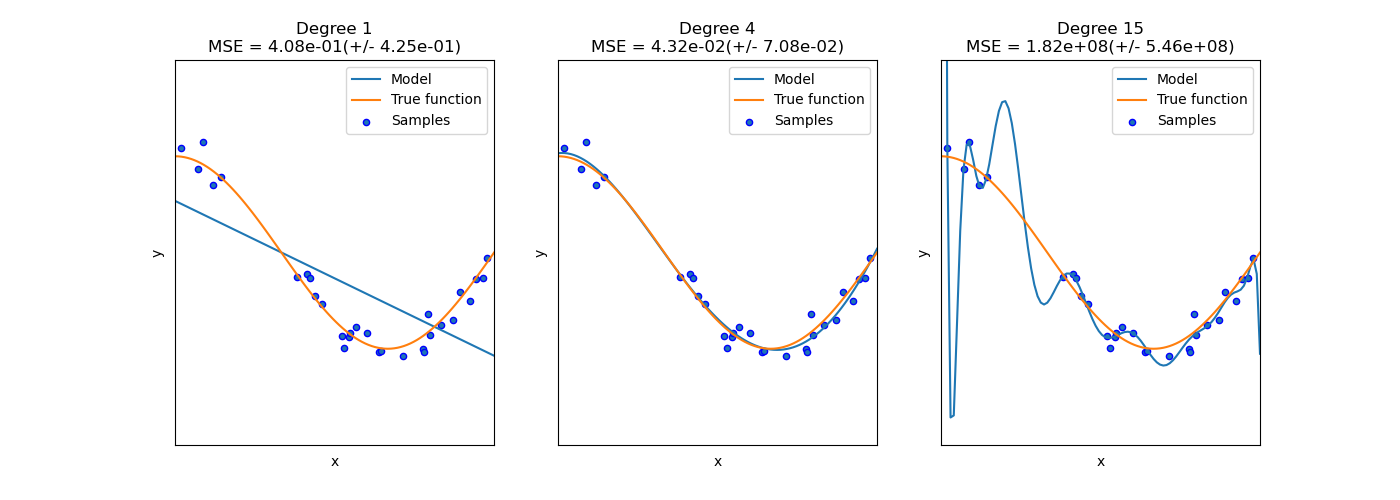

Bild von https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html

# Projekt: Toronto Bike Sharing

Wir haben Daten von Bike Share Toronto (https://bikesharetoronto.com/)
Für jede Reise werden Daten (z.B. von wo nach wo, wie lange dauerte die Fahrt) gesammelt, die online verfügbar sind (https://open.toronto.ca/dataset/bike-share-toronto-ridership-data/).

Wir wollen 1 Woche im Voraus vorhersagen, wie viele Räder an einem gewissen Tag an einer Station ausgeliehen werden.

# Daten

Bike Share Toronto, ~630 Stationen und ~7000 Räder.

Die Datenfelder sind
* Trip ID [int]
* Trip Duration [s, int]
* Trip Start Station ID [int]
* Trip Start time [timestamp]
* Trip Start Station Name [string]
* Trip End Station ID [int]
* Trip End Time [timestamp]
* Trip End Station Name [string]
* Bike ID [int]
* User type [string, eigentlich boolean 0/1 (member/casual)]


# Schritte 
1. Mache Dich mit den Daten vertraut (download, Einlesen)
2. Hauptaufgabe:

   a) Für jeden Tag und Station voraussagen, wie viele Fahrräder dort ausgeliehen werden.
   
   b) Extrahiere aus den Daten weitere Features, die die Vorhersage verbessern.
3. Mögliche Erweiterungen (erstmal ein Modell für Frage 2 bauen und evaluieren!):
 * Nutze weitere Datenquellen um die Vorhersage aus 2) zu verbessern (z.B. Wetter https://toronto.weatherstats.ca/download.html).
 * Was könnten andere Ziel-Variablen als "tägliche Anzahl Ausleihvorgänge" sein, die vielleicht für die Betreiber hilfreich(er) sind?
 * ...

Hinweise für Schritt 1 (Daten herunterladen, säubern und aggregieren)

1. Das Environment bike_share aktivieren.

2. Daten herunterladen und säubern, Annahme: wir sind im Projekt-Verzeichnis!

``` (bike-share-py3.10) $ python entry_points/load_data.py ```

3. Tägliche Ausleihzahlen berechnen

``` (bike-share-py3.10) $ python entry_points/compute_counts.py ```

# Links

## Nützliche Dokumentationen
https://pandas.pydata.org/docs/user_guide/indexing.html

https://pandas.pydata.org/docs/user_guide/merging.html

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html

https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html


## weitere Links
https://bikesharetoronto.com/faq/

https://www.kaggle.com/code/yclaudel/see-the-flow-of-bikes/notebook
(da wird auch beschrieben, wie man an die Stations-Daten https://tor.publicbikesystem.net/ube/gbfs/v1/en/station_information kommt)

https://tellingstorieswithdata.com/inputs/pdfs/paper_one-2022-hudson_yuen.pdf

https://toronto.weatherstats.ca/download.html (3 Jahre = 1095 Tage)

https://opendata.stackexchange.com/questions/7793/age-weight-and-height-dataset (Referenz auf https://github.com/rmcelreath/rethinking/blob/master/data/Howell1.csv und https://github.com/rmcelreath/rethinking/blob/master/data/Howell2.csv)